In [1]:
import torchvision
import torchvision.transforms as transforms
import torch
from torch import nn, optim
from torch.utils.data import DataLoader
from torch.utils.tensorboard import SummaryWriter
import time
from d2l import torch as d2l

In [2]:
transform = transforms.Compose(
    [transforms.ToTensor(),
    transforms.Normalize(mean=[0.5],std=[0.5])])

In [3]:
# 下载mnist数据集
trainset = torchvision.datasets.MNIST(root='./minst_data',train = True,download=True,transform = transform)

testset = torchvision.datasets.MNIST(root='./minst_data',train = False,download=True,transform = transform)

In [4]:
# 训练集和测试集的长度
trainset_size = len(trainset)
testset_size = len(testset)
print("训练集的个数",trainset_size)
print("测试集的个数",testset_size)

训练集的个数 60000
测试集的个数 10000


In [5]:
# 训练神经网络时加载训练数据集
trainloader = DataLoader(trainset, batch_size=32)
testloader = DataLoader(testset, batch_size=32)

In [6]:
# 构建网络
class Net(nn.Module):
    def __init__(self):
        super(Net,self).__init__()
        self.model = nn.Sequential(
            nn.Linear(28*28,32),
            nn.ReLU(),
            nn.Linear(32,500),
            nn.Sigmoid(),
            nn.Linear(500,10),
            nn.Softmax(dim=-1)
        
        )
    def forward(self,inputs):
        output = self.model(inputs)
        return output

In [7]:
net = Net()
print(net)


Net(
  (model): Sequential(
    (0): Linear(in_features=784, out_features=32, bias=True)
    (1): ReLU()
    (2): Linear(in_features=32, out_features=500, bias=True)
    (3): Sigmoid()
    (4): Linear(in_features=500, out_features=10, bias=True)
    (5): Softmax(dim=-1)
  )
)


In [8]:
# 以流程图显示出来
input = torch.ones((32,28*28))
writer = SummaryWriter("net")
writer.add_graph(net,input)
writer.close()

In [8]:
# 自己检查用的代码
for data in trainloader:
    inputs,targets = data
    print(targets)
    print(inputs.shape)
    inputs = torch.reshape(inputs,(32,28*28))
    print(inputs.shape)
    
    # inputs = torch.flatten(inputs)
    # print(inputs.shape)
    # print(targets)
    # 
    

tensor([5, 0, 4, 1, 9, 2, 1, 3, 1, 4, 3, 5, 3, 6, 1, 7, 2, 8, 6, 9, 4, 0, 9, 1,
        1, 2, 4, 3, 2, 7, 3, 8])
torch.Size([32, 1, 28, 28])
torch.Size([32, 784])
tensor([6, 9, 0, 5, 6, 0, 7, 6, 1, 8, 7, 9, 3, 9, 8, 5, 9, 3, 3, 0, 7, 4, 9, 8,
        0, 9, 4, 1, 4, 4, 6, 0])
torch.Size([32, 1, 28, 28])
torch.Size([32, 784])
tensor([4, 5, 6, 1, 0, 0, 1, 7, 1, 6, 3, 0, 2, 1, 1, 7, 9, 0, 2, 6, 7, 8, 3, 9,
        0, 4, 6, 7, 4, 6, 8, 0])
torch.Size([32, 1, 28, 28])
torch.Size([32, 784])
tensor([7, 8, 3, 1, 5, 7, 1, 7, 1, 1, 6, 3, 0, 2, 9, 3, 1, 1, 0, 4, 9, 2, 0, 0,
        2, 0, 2, 7, 1, 8, 6, 4])
torch.Size([32, 1, 28, 28])
torch.Size([32, 784])
tensor([1, 6, 3, 4, 5, 9, 1, 3, 3, 8, 5, 4, 7, 7, 4, 2, 8, 5, 8, 6, 7, 3, 4, 6,
        1, 9, 9, 6, 0, 3, 7, 2])
torch.Size([32, 1, 28, 28])
torch.Size([32, 784])
tensor([8, 2, 9, 4, 4, 6, 4, 9, 7, 0, 9, 2, 9, 5, 1, 5, 9, 1, 2, 3, 2, 3, 5, 9,
        1, 7, 6, 2, 8, 2, 2, 5])
torch.Size([32, 1, 28, 28])
torch.Size([32, 784])
tensor([0, 7, 4, 9, 7,

模型已保存


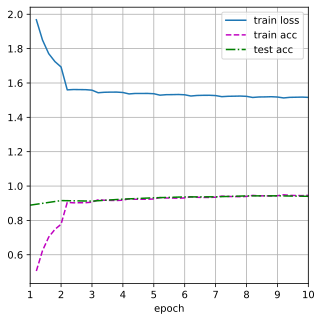

In [10]:
# 损失函数
loss = nn.CrossEntropyLoss()
# 设置优化器
learning_rate = 0.001
optimter = optim.RMSprop(net.parameters(),lr=learning_rate)
# 设置训练次数
train_step = 0
# 设置训练次数
test_step = 0
# 训练次数
epochs = 10
animator = d2l.Animator(xlabel='epoch', xlim=[1, epochs],
                    legend=['train loss', 'train acc', 'test acc'],figsize=(5,5))
# 训练的批次总数
num_batches = len(trainloader)
# 训练10次
for epoch in range(1,epochs+1):
    # 每一轮训练损失之和，训练准确率之和，样本数
    metric = d2l.Accumulator(3)
    #  开始训练
    start_time = time.time()
    net.train()
    for i,data in enumerate (trainloader):
        inputs,targets = data
        inputs = torch.reshape(inputs,(32,28*28))
        output = net(inputs)
        result_loss = loss(output,targets)
        # 把可调节参数的梯度调为0
        optimter.zero_grad()
        # 获取每个结点梯度的参数
        result_loss.backward()
        # 优化器调优
        optimter.step()
        train_step+=1
        if train_step%500==0:
            end_time = time.time()
            print("第{}轮训练500次时，花费的时间为:{}".format(epoch,end_time - start_time))
            print("训练次数：{}，Loss:{}".format(train_step,result_loss.item()))
            
        with torch.no_grad():
            metric.add(result_loss * inputs.shape[0], d2l.accuracy(output, targets), inputs.shape[0])
        # 训练总损失
        train_l = metric[0] / metric[2]
        #  训练总精度
        train_acc = metric[1] / metric[2]
        if (i + 1) % (num_batches // 5) == 0 or i == num_batches - 1:
                # 每一轮更新5次可视化或者每一轮结束时都会更新一次可视化。
                # epoch + (i + 1) / num_batches相当于给x轴赋值
                # 同理 其他三个相当于给y轴赋值
                animator.add(epoch + (i + 1) / num_batches,
                            (train_l, train_acc, None))
        
    print("第{}次训练结束".format(epoch))
    with torch.no_grad():
        # 测试的准确率
        total_accuracy = 0
        runing_loss = 0
        # 测试步骤开始
        net.eval()
        for test in testloader:
            test_step+=1
            if test_step%313==0:
                break
            inputs,targets = test
            inputs = torch.reshape(inputs,(32,28*28))
            output = net(inputs)
            result_loss = loss(output,targets)
            runing_loss+=result_loss.item()
            accuracy = (output.argmax(1) == targets).sum()
            total_accuracy +=accuracy
    print("每{}轮测试集上的损失Loss:{}".format(epoch,runing_loss))
    print("每{}轮测试集上的正确率:{}".format(epoch,total_accuracy/testset_size))
    animator.add(epoch,(None, None, total_accuracy/testset_size))
    
    # 模型保存
    torch.save(net,"./model_{}.pth".format(epoch))
    print("模型已保存")

In [11]:
import numpy as np
from matplotlib import pyplot as plt
classes = ('0','1','2','3','4','5','6','7','8','9')
#  预测
# 1、显示数据集中的图片
def imshow(img):
    img = img / 2 + 0.5  # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

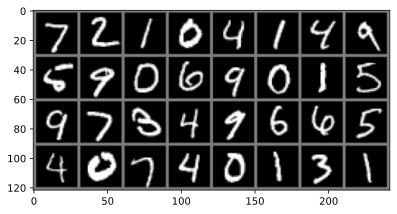

In [12]:
dataiter = iter(testloader)
images, labels = next(dataiter)
imshow(torchvision.utils.make_grid(images))
# print(' '.join(f'{classes[labels[j]]:5s}' for j in range(32)))

In [13]:
# 加载模型
net = Net()
model = torch.load("./model_10.pth",map_location=torch.device("cpu"))
print(model)
images = torch.reshape(images,(32,28*28))
outputs = model(images)
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join(f'{classes[predicted[j]]:5s}' for j in range(32)))


Net(
  (model): Sequential(
    (0): Linear(in_features=784, out_features=32, bias=True)
    (1): ReLU()
    (2): Linear(in_features=32, out_features=500, bias=True)
    (3): Sigmoid()
    (4): Linear(in_features=500, out_features=10, bias=True)
    (5): Softmax(dim=-1)
  )
)
Predicted:  7     2     1     0     4     1     4     9     6     9     0     6     9     0     1     5     9     7     3     4     9     6     6     5     4     0     7     4     0     1     3     1    
